In [1]:
## Source the files in the "functions" folder
files <- dir("functions",full.names=TRUE)
for(i in 1:length(files)) source(files[i])

### read & plot


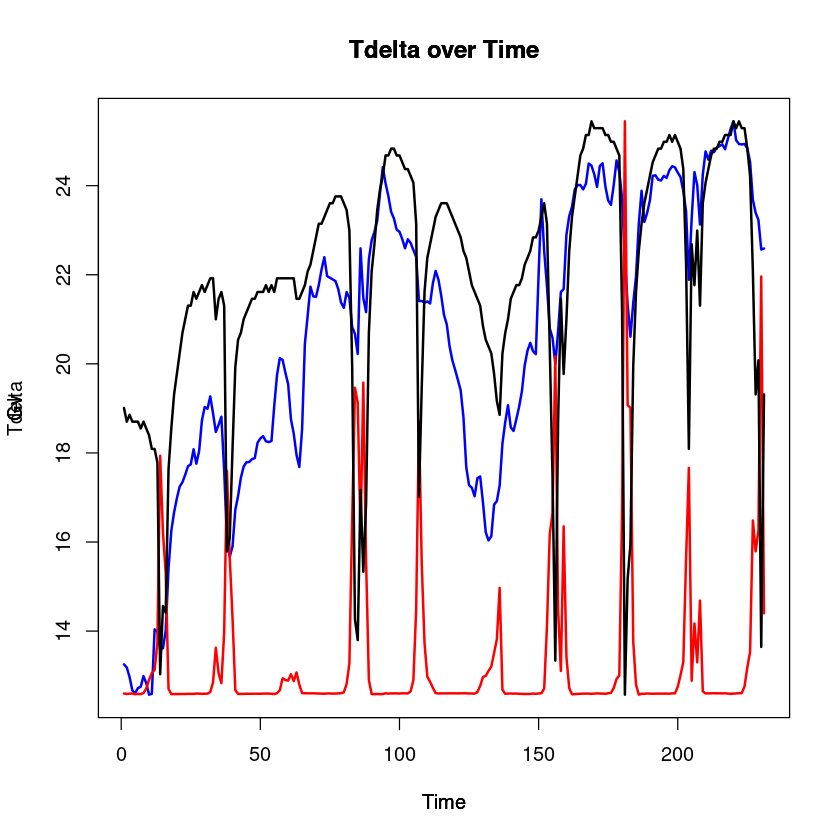

In [2]:
D <- read.csv("box_data_60min.csv", header = TRUE)
D$thour <- D$thour-D$thour[1]+1

par(bg = 'white')
plot(D$thour,D$Tdelta, type = "l", col = "blue", lwd = 2, xlab = "Time", ylab = "Tdelta", main = "Tdelta over Time")
# plot on the same graph secondary y-axis
par(new = TRUE)
plot(D$thour,D$Gv, type = "l", col = "red", lwd = 2, xlab = "Time", ylab = "Gv", main = "Tdelta over Time", axes = FALSE)
# third y axis
par(new = TRUE)
plot(D$thour,D$Ph, type = "l", col = "black", lwd = 2, xlab = "Time", ylab = "Gv", main = "Tdelta over Time", axes = FALSE)

2. Split the data into a train and test set, such that ”2013-02-06 00:00” is the last data point in the
training set (i.e. thour = 1, ..., 167 is the training set). From now on, work only on the training
set, except where explicitly told to use the test set.

In [3]:
## Divide intro train and test set
teststart <- 167
Dtrain <- D[D$thour < teststart, ]
Dtest <- D[D$thour >= teststart, ]

# show first 10 rows of the training set
head(Dtrain, 5)


,thour,tdate,Ph,Tdelta,Gv,Ph.l0,Ph.l1,Ph.l2,Ph.l3,Ph.l4,⋯,Gv.l1,Gv.l2,Gv.l3,Gv.l4,Gv.l5,Gv.l6,Gv.l7,Gv.l8,Gv.l9,Gv.l10
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2013-01-30 02:00:00,56,13.25358,-0.4986434,56,55,57,57,58,⋯,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003,8.2623385,20.4754845
2,2,2013-01-30 03:00:00,54,13.18146,-1.1270349,54,56,55,57,57,⋯,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003,8.2623385
3,3,2013-01-30 04:00:00,55,12.96879,-0.6432978,55,54,56,55,57,⋯,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003
4,4,2013-01-30 05:00:00,54,12.66775,-0.4560078,54,55,54,56,55,⋯,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765
5,5,2013-01-30 06:00:00,54,12.60525,-1.5340601,54,54,55,54,56,⋯,-0.4560078,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668


3. Investigate the variables and their relations: e.g. with scatter, auto-correlation and cross-correlation
plots. Most focus on Ph. Highlight key aspects of the dynamics and interrelationships among
the variables. What can be seen directly and what canno

png 
  3

pdf 
  2

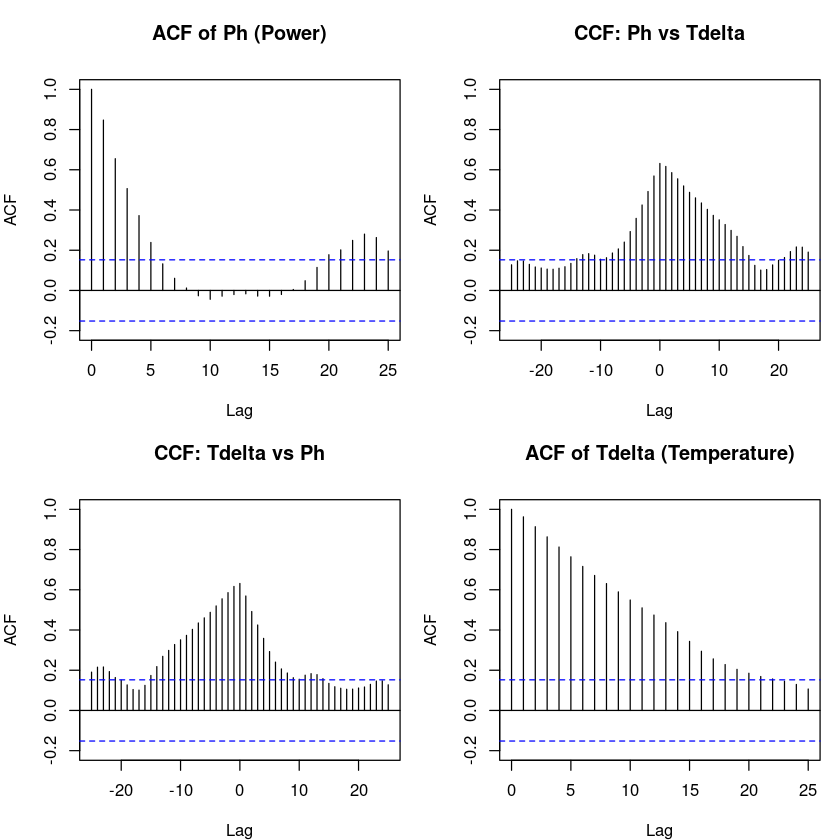

png 
  3

pdf 
  2

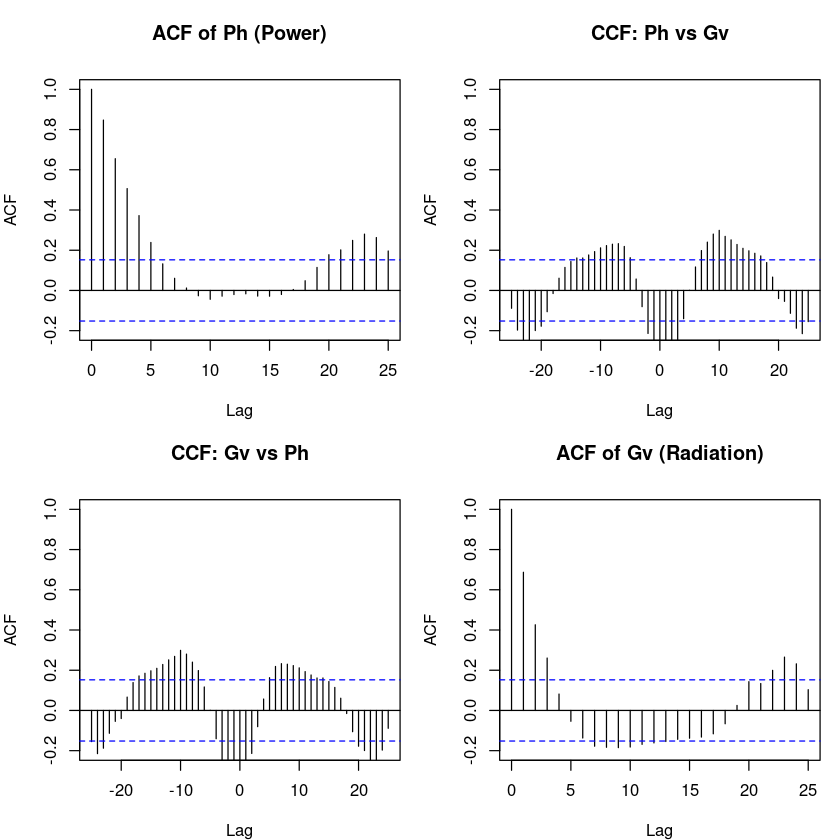

In [4]:
# Plot with 2*2 subplots with headlines for each subplot
par(mfrow=c(2,2), mar=c(4,4,4,1), bg = 'white') 

acf(Dtrain$Ph, main = "ACF of Ph (Power)", lag.max = 25, ylim = c(-0.2, 1))

ccf(Dtrain$Ph, Dtrain$Tdelta, lag.max = 25, ylim = c(-0.2, 1), main = "CCF: Ph vs Tdelta")

ccf(Dtrain$Tdelta, Dtrain$Ph, lag.max = 25, ylim = c(-0.2, 1), main = "CCF: Tdelta vs Ph")

acf(Dtrain$Tdelta, lag.max = 25, ylim = c(-0.2, 1), main = "ACF of Tdelta (Temperature)")
# save figure
dev.copy(png, file = "acf_ccf_Ph_Tdelta.png", width = 600, height = 600, res = 100)
dev.off()

par(mfrow=c(2,2), mar=c(4,4,4,1), bg = 'white') 

acf(Dtrain$Ph, main = "ACF of Ph (Power)", lag.max = 25, ylim = c(-0.2, 1))

ccf(Dtrain$Ph, Dtrain$Gv, lag.max = 25, ylim = c(-0.2, 1), main = "CCF: Ph vs Gv")

ccf(Dtrain$Gv, Dtrain$Ph, lag.max = 25, ylim = c(-0.2, 1), main = "CCF: Gv vs Ph")

acf(Dtrain$Gv, lag.max = 25, ylim = c(-0.2, 1), main = "ACF of Gv (Radiation)")
# save figure
# bigger text size
dev.copy(png, file = "acf_ccf_Ph_Gv.png", width = 600, height = 600, res = 100)
dev.off()




3.4. Estimate the impulse response from Tdelta and Gv to Ph make it up to lag 10. Present it for both
variables in plots and comment

In [6]:
# impulse response function from Tdelta to Ph
# 1. Fit a VAR model to the data
#library(vars)
var_model <- VAR(Dtrain[, c("Ph", "Tdelta")], p = 1, type = "const")
# 2. Compute the impulse response function
irf_model <- irf(var_model, impulse = "Tdelta", response = "Ph", n.ahead = 25, boot = TRUE)
# 3. Plot the impulse response function
par(bg = 'white')
plot(irf_model, main = "Impulse Response Function: Tdelta to Ph", xlab = "Time", ylab = "Response of Ph")


ERROR: Error in VAR(Dtrain[, c("Ph", "Tdelta")], p = 1, type = "const"): could not find function "VAR"
